# Evalucíon 2 
*5 de abril del 2021*\
Se pide resolver numéricamente la ecuación diferencial de un oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal, con ayuda de la función odeint de scipy.integrate.

La ecuación diferencial del oscilador amortiguado es

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}$$
donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

$$\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}$$
y $\zeta$ es la tasa de amortiguamiento dado por la expresión

$$\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}$$
siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire.

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$).

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:

- Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar.
- Críticamente amortiguado ($\zeta = 1$).
- Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente.
- Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular.

**Problema 1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1$, $k=9$, $x(0) < 0$, $x'(0) = 0$.

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$:

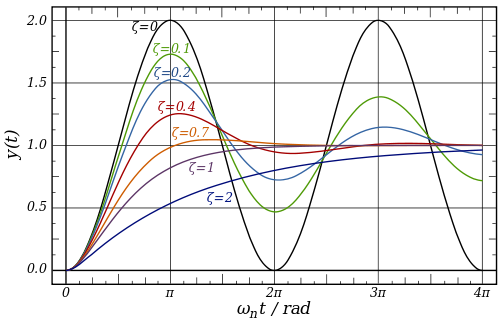

In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

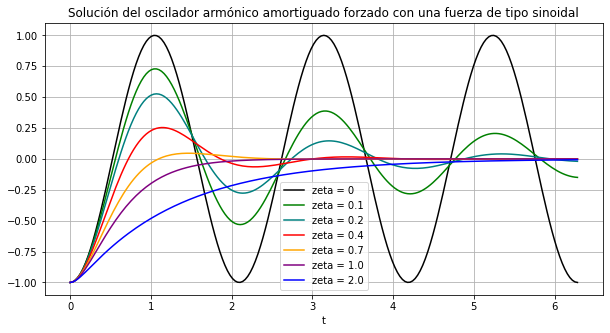

In [6]:
def oscilador(y, t, b, k):
        x, v = y
        dydt = [v, -2*zeta*omega0*v-np.power(omega0,2)*x]
        return dydt

zeta = 0.0
#raíz cuadrada de 9 entre la masa, es la frecuencia angular de oscilador con masa 1 y constante 9
omega0 = 3.0

y0 = [-1.0, 0.0]

#tiempo de integracíon
t = np.linspace(0, 2*np.pi, 201)

y = odeint(oscilador, y0, t, args=(zeta, omega0))
zeta= 0.1

y1 = odeint(oscilador, y0, t, args=(zeta, omega0))
zeta= 0.2

y2 = odeint(oscilador, y0, t, args=(zeta, omega0))
zeta= 0.4

y3 = odeint(oscilador, y0, t, args=(zeta, omega0))
zeta= 0.7

y4 = odeint(oscilador, y0, t, args=(zeta, omega0))
zeta= 1.0

y5 = odeint(oscilador, y0, t, args=(zeta, omega0))
zeta= 2.0

y6 = odeint(oscilador, y0, t, args=(zeta, omega0))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'black', label='zeta = 0')
plt.plot(t, y1[:, 0], 'g', label='zeta = 0.1')
plt.plot(t, y2[:, 0], 'teal', label='zeta = 0.2')
plt.plot(t, y3[:, 0], 'r', label='zeta = 0.4')
plt.plot(t, y4[:, 0], 'orange', label='zeta = 0.7')
plt.plot(t, y5[:, 0], 'purple', label='zeta = 1.0')
plt.plot(t, y6[:, 0], 'blue', label='zeta = 2.0')
plt.legend(loc='best')
plt.title('Solución del oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal')
plt.xlabel('t')
plt.grid()
plt.show()

**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

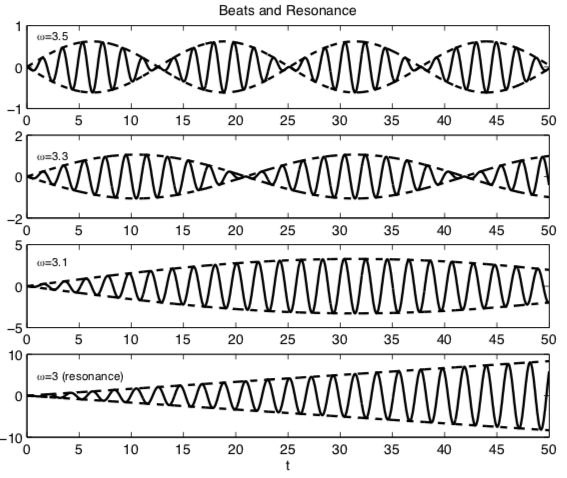

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

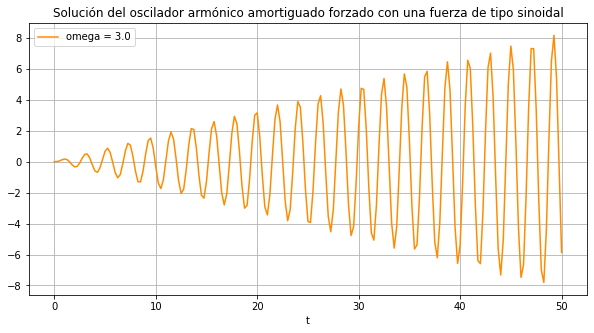

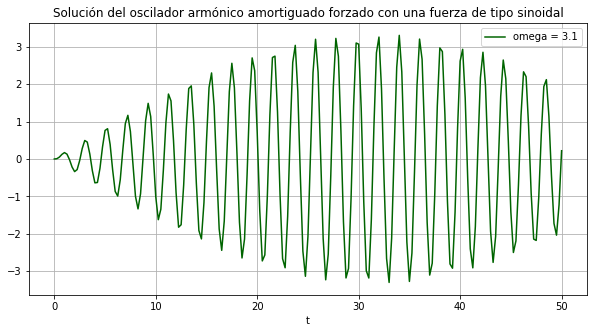

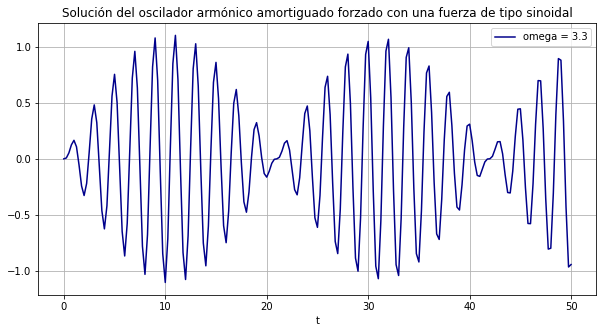

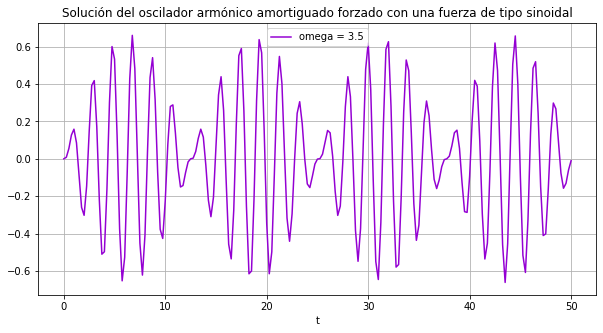

In [8]:
def oscilador(y, t, b, k):
        x, v = y
        dydt = [v, np.sin(omega*t)-np.power(omega_n,2)*x]
        return dydt
omega = 3.0
omega_n = 3.0

y0 = [0.0, 0.0]

t = np.linspace(0, 50, 201)

y = odeint(oscilador, y0, t, args=(omega, omega_n))
omega = 3.1
y1 = odeint(oscilador, y0, t, args=(omega, omega_n))
omega = 3.3
y2 = odeint(oscilador, y0, t, args=(omega, omega_n))
omega = 3.5
y3 = odeint(oscilador, y0, t, args=(omega, omega_n))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'darkorange', label='omega = 3.0')
plt.legend(loc='best')
plt.title('Solución del oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, y1[:, 0], 'darkgreen', label='omega = 3.1')
plt.legend(loc='best')
plt.title('Solución del oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, y2[:, 0], 'darkblue', label='omega = 3.3')
plt.legend(loc='best')
plt.title('Solución del oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, y3[:, 0], 'darkviolet', label='omega = 3.5')
plt.legend(loc='best')
plt.title('Solución del oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal')
plt.xlabel('t')
plt.grid()
plt.show()

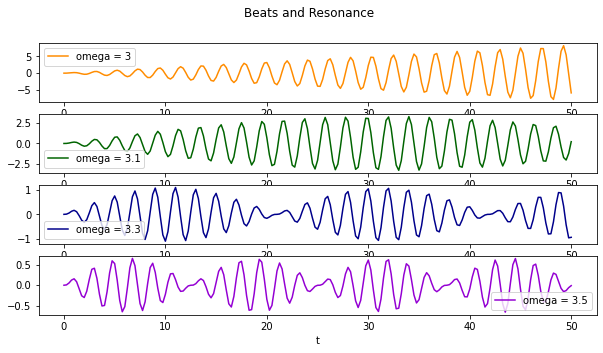

In [11]:
# graficamos con subplots
fig, axs = plt.subplots(4,figsize=(10,5))
fig.suptitle('Beats and Resonance')
axs[0].plot(t, y[:,0], 'darkorange', label='omega = 3')
axs[1].plot(t, y1[:,0],'darkgreen', label='omega = 3.1')
axs[2].plot(t, y2[:,0], 'darkblue', label='omega = 3.3')
axs[3].plot(t, y3[:,0], 'darkviolet', label='omega = 3.5')

plt.xlabel('t')
axs[0].legend(loc='best');
axs[1].legend(loc='best');
axs[2].legend(loc='best');
axs[3].legend(loc='best');
plt.show()

**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

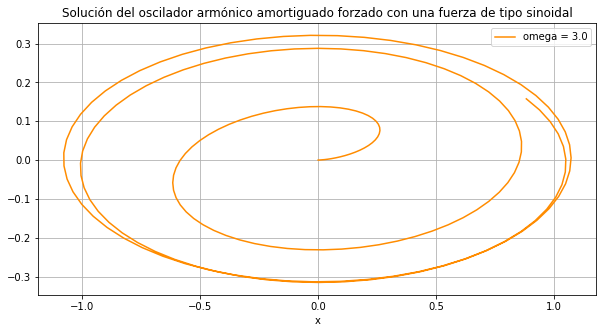

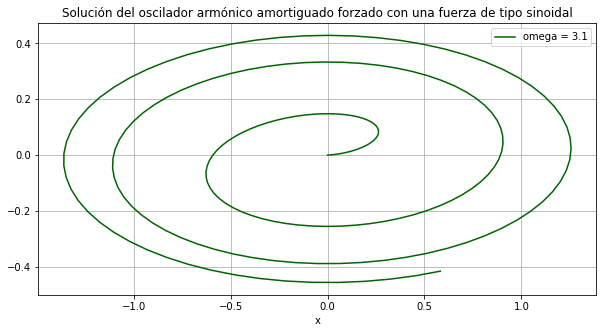

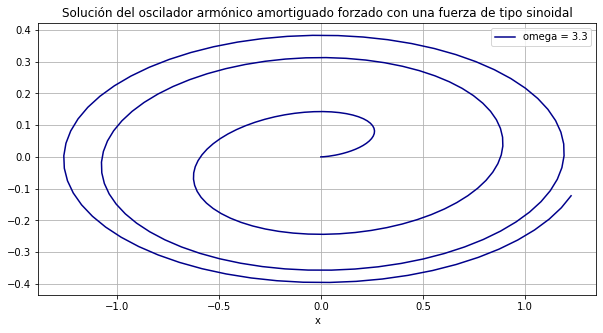

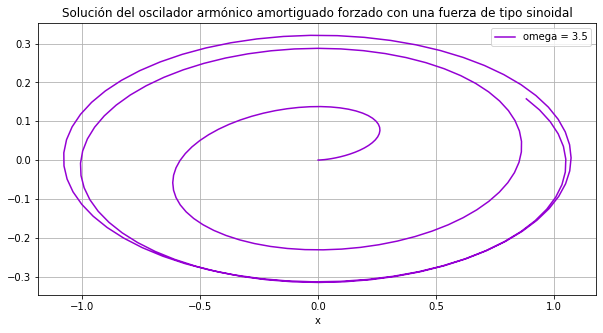

In [13]:
def oscilador(y, t, b, k):
        x, v = y
        dydt = [v, np.sin(omega*t)-2*zeta*omega_n*v-np.power(omega0,2)*x]
        return dydt

zeta = 0.1
omega0 = 3.0

y0 = [0.0, 0.0]

t = np.linspace(0, 2*np.pi, 201)

y = odeint(oscilador, y0, t, args=(zeta, omega0))
omega = 3.1
y1 = odeint(oscilador, y0, t, args=(zeta, omega0))
omega = 3.3
y2 = odeint(oscilador, y0, t, args=(zeta, omega0))
omega = 3.5
y3 = odeint(oscilador, y0, t, args=(zeta, omega0))

plt.figure(figsize=(10,5))
plt.plot(y[:, 1], y[:, 0], 'darkorange', label='omega = 3.0')
plt.legend(loc='best')
plt.title('Solución del oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal')
plt.xlabel('x')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y1[:, 1], y1[:, 0], 'darkgreen', label='omega = 3.1')
plt.legend(loc='best')
plt.title('Solución del oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal')
plt.xlabel('x')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y2[:, 1], y2[:, 0], 'darkblue', label='omega = 3.3')
plt.legend(loc='best')
plt.title('Solución del oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal')
plt.xlabel('x')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y3[:, 1], y3[:, 0], 'darkviolet', label='omega = 3.5')
plt.legend(loc='best')
plt.title('Solución del oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal')
plt.xlabel('x')
plt.grid()
plt.show()

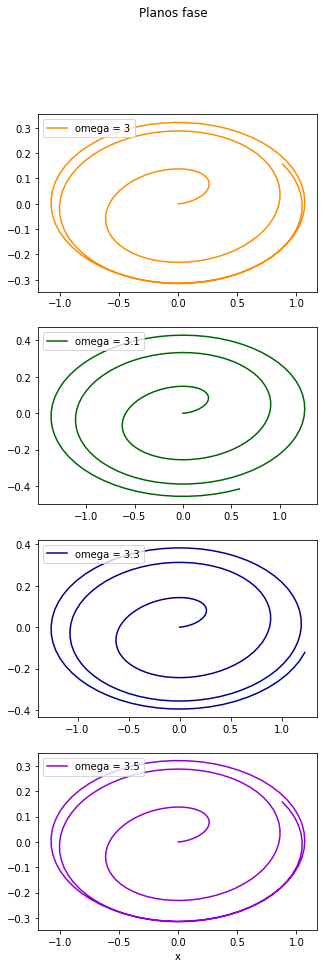

In [17]:
# graficamos con subplots
fig, axs = plt.subplots(4,figsize=(5,15))
fig.suptitle('Planos fase')
# para obtener los planos fases, graficamos con ambas soluciones
axs[0].plot(y[:,1],y[:,0], 'darkorange', label='omega = 3')
axs[1].plot(y1[:,1],y1[:,0], 'darkgreen', label='omega = 3.1')
axs[2].plot(y2[:,1],y2[:,0], 'darkblue', label='omega = 3.3')
axs[3].plot(y3[:,1],y3[:,0], 'darkviolet', label='omega = 3.5')

plt.xlabel('x')
axs[0].legend(loc='best');
axs[1].legend(loc='best');
axs[2].legend(loc='best');
axs[3].legend(loc='best');
plt.show()